In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reliability.Distributions import Weibull_Distribution

In [2]:
# 1. Definirea condițiilor de test
T_use = 40 + 273.15    # 40°C în Kelvin
T_stress = 105 + 273.15 # 105°C în Kelvin
Ea = 0.7               # Energia de activare tipică pentru semiconductori (eV)
k = 8.617e-5           # Constanta Boltzmann (eV/K)

In [3]:
# 2. Calculul Factorului de Accelerare (AF)
AF = np.exp((Ea / k) * (1/T_use - 1/T_stress))
print(f"Factorul de Accelerare: {AF:.2f}")
print(f"Fiecare oră de test la 105°C echivalează cu {AF:.2f} ore la 40°C.")

Factorul de Accelerare: 86.40
Fiecare oră de test la 105°C echivalează cu 86.40 ore la 40°C.


In [4]:
# 3. Date obținute în laborator (ore până la defectare la 105°C)
# Presupunem că am determinat prin Fit_Weibull că piesa are:
alpha_stress = 500  # Ore la temperatură mare
beta = 2.2          # Factor de formă (uzură)

In [5]:
# 4. Extrapolarea pentru condiții normale
alpha_use = alpha_stress * AF
dist_normal = Weibull_Distribution(alpha=alpha_use, beta=beta)


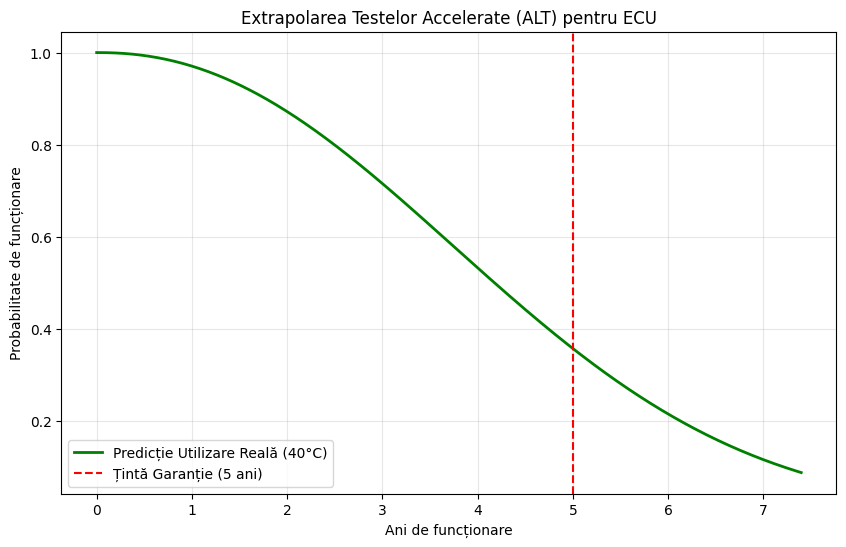

Viața caracteristică estimată în condiții normale: 4.93 ani


In [6]:
# 5. Vizualizarea curbei de supraviețuire reale vs. test
ore_normal = np.linspace(0, alpha_use * 1.5, 500)
supravietuire = [np.exp(-(t / alpha_use)**beta) for t in ore_normal]

plt.figure(figsize=(10, 6))
plt.plot(ore_normal / 8760, supravietuire, label='Predicție Utilizare Reală (40°C)', color='green', lw=2)
plt.axvline(x=5, color='red', linestyle='--', label='Țintă Garanție (5 ani)')
plt.title('Extrapolarea Testelor Accelerate (ALT) pentru ECU')
plt.xlabel('Ani de funcționare')
plt.ylabel('Probabilitate de funcționare')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Viața caracteristică estimată în condiții normale: {alpha_use/8760:.2f} ani")

# 1. Validarea ProiectuluiDacă testul tău de 500 de ore în laborator (la căldură extremă) echivalează cu aproximativ 50.000 de ore în condiții reale (peste 5 ani), și majoritatea pieselor au supraviețuit, atunci designul este validat pentru garanție.
2. Determinarea Punctelor SlabeDacă în timpul testului accelerat observi un $\beta < 1$ (defecte timpurii), înseamnă că procesul de fabricație are probleme (ex: lipituri reci pe placa de circuit). Dacă $\beta > 1$, ai un proces de uzură naturală pe care îl poți monitoriza.
3. Economie de Timp și BaniFără acest model, ar trebui să testezi mii de mașini în trafic real timp de ani de zile. Cu ALT, poți da OK-ul pentru producția de serie în câteva săptămâni.
### Metodologia ALT (Accelerated Life Testing)
Folosim modelul **Arrhenius-Weibull** pentru a comprima timpul de testare.
Raportul dintre timpul de viață în condiții de stres ($L_s$) și cel în condiții normale ($L_u$) este:
$$L_u = L_s \times AF$$
Acest model ne permite să transformăm datele de laborator în decizii strategice de business privind durata garanției oferite clienților.